Задача 4
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

[  0  11  48  67  89  93 125 151 146 270]


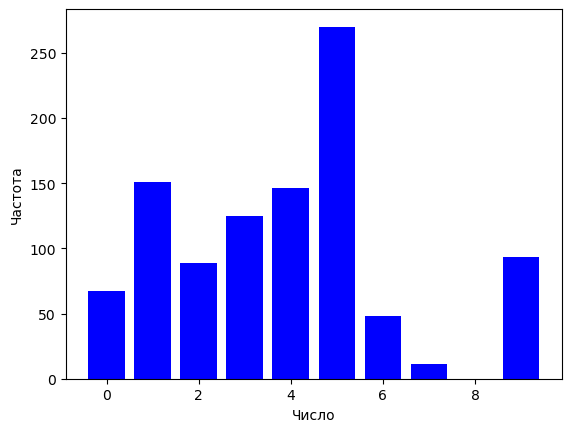

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

def sample_discrete(cdf_probs, values, size):
    result = np.array([])
    cdf_size = cdf_probs.size
    for i in range(size):
        a = np.random.rand()
        for idx in range(cdf_size):
            if cdf_probs[idx] > a:
                break
        result = np.append(result, values[idx])
    return result.astype(int)


weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
numbers = np.arange(10)
probs = weights / weights.sum()
sorted_index = np.argsort(probs)
sorted_probs = probs[sorted_index]
sorted_numbers = numbers[sorted_index]

cdf_probs = np.cumsum(sorted_probs)

sample = sample_discrete(cdf_probs, numbers, 1000)

counts = np.bincount(sample)
print(counts)
plt.bar(sorted_numbers, counts, color = 'blue')
plt.xlabel('Число')
plt.ylabel('Частота')
plt.show()

Задача 5
Смоделируйте выборку размера 1000 из распределения  Exp(λ)  с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

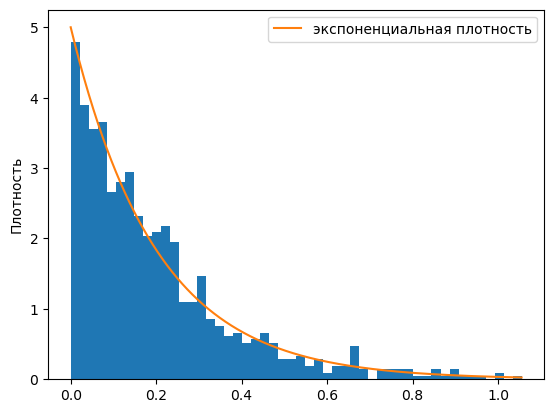

In [2]:
import numpy as np
import matplotlib.pyplot as plt

size = 1000
a = np.random.rand(size)
lambd = 5.0
y = (-1) * np.log(a) / lambd

plt.hist(y, bins = 50, density = True)

x = np.linspace(0, y.max(), 1000)
density = lambd * np.exp( (-1) * lambd * x)
plt.plot(x, density, label = 'экспоненциальная плотность')

plt.ylabel('Плотность')
plt.legend()
plt.show()

Task 6
Смоделируйте 1000 точек из распределения с плотностью  excos2x  на отрезке  [−π/2,π/2] . По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

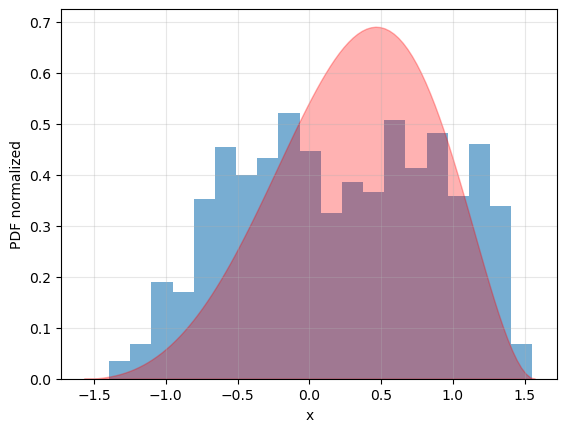

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def density(x):
    return np.exp(x) * np.cos(x) ** 2

def given_dens(x):
    return 1 / np.pi

a = (-1) * np.pi / 2
b = np.pi / 2

size = 1000
sample = np.array([])
while len(sample) < size:
    x = np.random.uniform(a, b)
    y = np.random.uniform(0, given_dens(x))

    if y < density(x):
        sample = np.append(sample, x)

%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

plt.hist(sample, bins = 20, density=True, alpha=0.6)

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = density(x)  # not normalized density!
integral = np.trapezoid(density, x)
norm_dens = density / integral
plt.fill_between(x, 0, norm_dens, alpha = 0.3, color='red')

plt.ylabel('PDF normalized')
plt.xlabel('x')
plt.grid(True, alpha=0.3)
plt.show()

Task 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

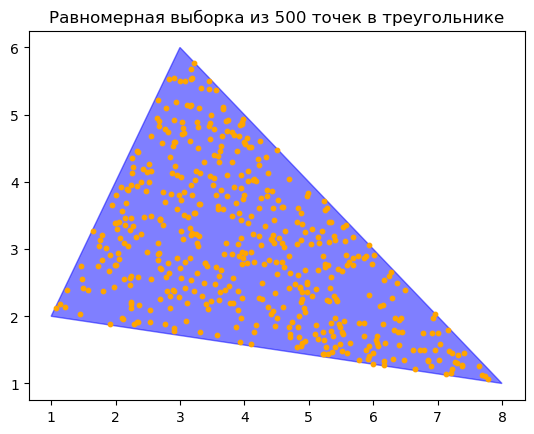

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


size = 500
weights1 = np.random.rand(size)
weights2 = np.random.rand(size)

new_weights1 = (1 - np.sqrt(weights1)).reshape(size, 1)
new_weights2 = (np.sqrt(weights1) * (1 - weights2)).reshape(size, 1)
new_weights3 = (np.sqrt(weights1) * weights2).reshape(size, 1)

A1 = np.array([1,2])
A2 = np.array([3,6])
A3 = np.array([8,1])

sample = new_weights1 * A1 + new_weights2 * A2 + new_weights3 * A3

fig, ax = plt.subplots()
fig.patch.set_facecolor('xkcd:white')
triangle_vertices = np.array([A1, A2, A3])

polygon = Polygon(triangle_vertices, closed = True, color = 'blue', alpha = 0.5)
patches = PatchCollection([polygon], alpha = 0.3)
ax.add_patch(polygon)  
ax.scatter(sample[:, 0], sample[:, 1], s = 10, color = 'orange')
ax.set_title('Равномерная выборка из 500 точек в треугольнике')
plt.show()

Задача 8
Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

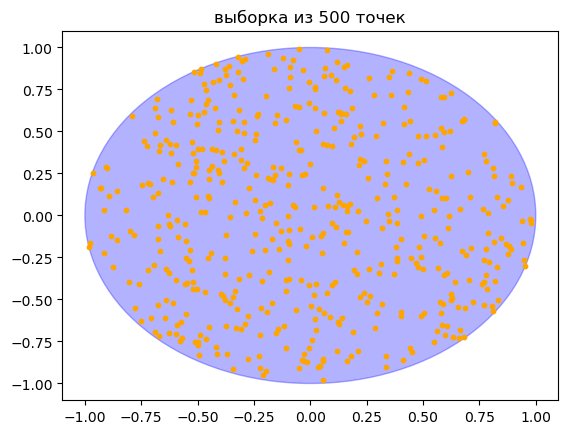

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

size = 500

r = np.sqrt(np.random.rand(size))
alpha = 2 * np.pi * np.random.rand(size)
x = r * np.cos(alpha)
y = r * np.sin(alpha)

fig, ax = plt.subplots()
fig.patch.set_facecolor('xkcd:white')
circle = Circle((0, 0), 1, color = 'blue', alpha = 0.3)
ax.add_patch(circle)
ax.scatter(x, y, s = 10, color = 'orange')
ax.set_title('выборка из 500 точек')
plt.show()

Задача 9
Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20, -4], [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

Сравнение средних
 [4 7] [3.84120417 6.93610461]
Сравнение ков. матриц:
 [[20 -4]
 [-4 40]] [[19.14137155 -2.91417132]
 [-2.91417132 38.35265138]]


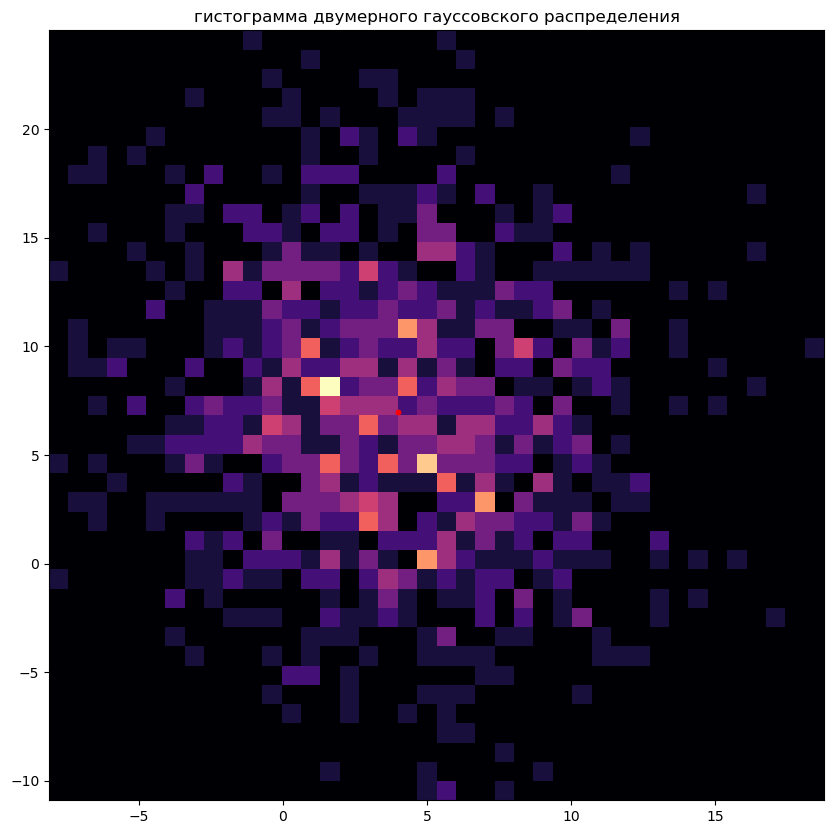

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import sqrtm

def get_sample(sample_size):
    sample = (np.array([])).reshape(0,2)
    while len(sample) < sample_size:
        x = 2 * np.random.rand(sample_size) - 1
        y = 2 * np.random.rand(sample_size) - 1
        length = x ** 2 + y ** 2
        mask = ( length < 1) & ( length !=0)
        good_x = x[mask]
        good_y = y[mask]
        good_length = length[mask]

        new_x = good_x * np.sqrt( (-2) * np.log(good_length) / good_length)
        new_y = good_y * np.sqrt( (-2) * np.log(good_length) / good_length)

        sample = np.vstack((sample, np.column_stack((new_x,new_y))))

    return sample

sample_size = 1000

X = get_sample(sample_size)[:sample_size]

u = np.array([4,7])
cov_matrix = np.array([[20, -4],
                       [-4, 40]])

# A* c ~ N(A*u, A*cov_matrix*A^t), где c ~ N(u, cov_matrix)
# ищем такую A

L_sqrt = sqrtm(cov_matrix)
L_sqrt = np.real(L_sqrt)

Y = u + X @ L_sqrt.T

sample_mean = np.mean(Y, axis=0)
sample_cov = np.cov(Y, rowvar = False)

print("Сравнение средних\n", u, sample_mean)
print("Сравнение ков. матриц:\n", cov_matrix, sample_cov)


plt.figure(figsize = (10, 10), facecolor='xkcd:white')
plt.hist2d(Y[:, 0], Y[:, 1], bins = 40, cmap ='magma')
plt.scatter([u[0]], [u[1]], color='red', s = 10)
plt.title('гистограмма двумерного гауссовского распределения')
plt.show()